## Plotting SHP File

In [1]:
# This just lets the output of the following code samples
#  display inline on this page, at an appropriate size.
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

In [2]:
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
from pysal.core.util import shapefile as shpf
import matplotlib.pyplot as plt

In [3]:
shp_link = 'IL_BNDY_County_Py.shp'        #File to open
shp = ps.open(shp_link)                   #Open file with PySAL I/O

In [18]:
fig = plt.figure()                        #Creates canvas to plot on
base = maps.map_poly_shp(shp)             #Creates layer from shp file
base.set_facecolor('yellow')              #Sets color of shapes
base.set_linewidth('0.2')                 #Sets line width
base.set_edgecolor('0.1')                 #Sets how dark/light line is
shp.close()                               #Close the file

AssertionError: 

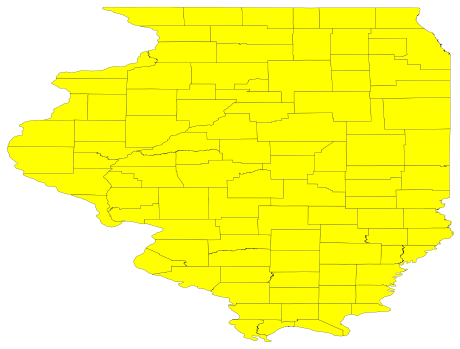

In [19]:
ax = maps.setup_ax([base])                #Create axes for base layer
fig.add_axes(ax)                          #Adds axes/layer to canvas
plt.show()                                #Displays plot

## Random Sampling

In [4]:
"""
Takes a random sample from a shapefile and returns a new shp file of samples

PARAMETERS:
    String    shp_link   : path to file to be sampled from
    Int       samp_size  : number of samples to take
    String    shape_type : type of shape being sampled

"""
def rand_sample(shp_link, samp_size, shape_type):
    shp_file = shpf.shp_file(shp_link)
    samples = shpf.shp_file('samples.shp','w',shape_type) #File to write to
    selected = []                                         #List of selections
    file_len = len(shp_file)                              #Length of source file
    
    for i in range(samp_size):
        #Get unique sample index
        index = rdm.randint(0, file_len-1)              #Generate random index
        if index in selected:                           #Check if index is unique
            while index in selected:                    #Loop until unique index
                index = rdm.randint(0, file_len)
        selected.append(index)                          #Append index to selected
        
        sample = shp_file.get_shape(index)              #Gets shape at index
        samples.add_shape(sample)                       #Writes shape to file
    
    samples.close()                                     #Close file
    data = ps.open('samples.shp')                       #Re-open file with PySAL 
    
    return data                                         #Return file

In [5]:
samples = rand_sample(shp_link, 12, 'POLYGON')

In [6]:
fig = plt.figure()
base = maps.map_poly_shp(samples)
base.set_facecolor('yellow')
base.set_linewidth('0.2')
base.set_edgecolor('0.1')
samples.close()

AssertionError: 

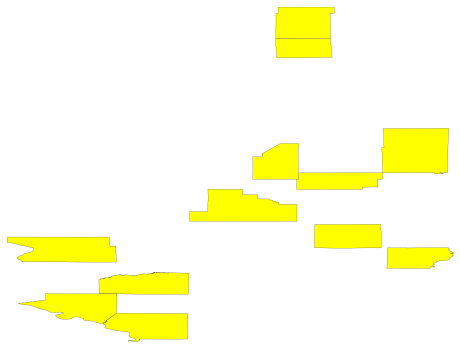

In [7]:
ax = maps.setup_ax([base])
fig.add_axes(ax)
plt.show()